In [12]:
import pandas as pd
import sqlite3
import time
import seaborn as sns
import matplotlib.pyplot as plt

conn = sqlite3.connect("RegistroObjetos.db")
c = conn.cursor()
c.execute('PRAGMA cache_size = 0')

In [4]:
analiseDesempenho = {   
                        1: {},
                        2: {},
                        3: {},
                        4: {},
                        5: {},
                        6: {},
                        7: {},
                        8: {},
                        9: {},
                        10: {}
                    }

In [17]:
mean = 0
for i in range(100):
    inicio = time.time()
    df = pd.read_sql('select Pac from Objeto GROUP BY Pac', conn)
    fim = time.time()
    mean += fim-inicio
analiseDesempenho[1][1] = mean/100
mean = 0
for i in range(100):
    inicio = time.time()
    df = pd.read_sql('select distinct Pac from Objeto', conn)
    fim = time.time()
    mean += fim-inicio
analiseDesempenho[1][2] = mean/100

mean = 0
for i in range(100):
    inicio = time.time()
    df = pd.read_sql('select RazaoSocial,Logradouro, Numero, Complemento, Cep, Bairro, Municipio, UF '+
                 'from Empresa where RazaoSocial = "BMW do Brasil LTDA"', conn)
    fim = time.time()
    mean += fim-inicio
analiseDesempenho[2][1] = mean/100
mean = 0
for i in range(100):
    inicio = time.time()
    df = pd.read_sql('select RazaoSocial,Logradouro, Numero, Complemento, Cep as CEP, Bairro, Municipio, UF as Estado '+
                 'from Empresa where RazaoSocial in ("BMW do Brasil LTDA")', conn)
    fim = time.time()
    mean += fim-inicio
analiseDesempenho[2][2] = mean/100

mean = 0
for i in range(100):
    inicio = time.time()
    df = pd.read_sql('select UF, count(*) as Total from '+
                      'Empresa as e natural join Registros as r '+
                      'where r.Status = "Ativo" '+
                      'group by UF '+
                      'order by total ASC ', conn)
    fim = time.time()
    mean += fim-inicio
analiseDesempenho[3][1] = mean/100
mean = 0
for i in range(100):
    inicio = time.time()
    df = pd.read_sql('select UF, count(*) as Total '+
                      'from Registros as r join Empresa as e on r.CNPJ = e.CNPJ '+
                      'where r.Status = "Ativo" '+
                      'group by UF '+
                      'order by total ASC ', conn)
    fim = time.time()
    mean += fim-inicio
analiseDesempenho[3][2] = mean/100

mean = 0
for i in range(100):
    inicio = time.time()
    df = pd.read_sql( 'SELECT CNPJ, RazaoSocial, UF FROM Empresa e '
                  ' NATURAL JOIN '
                  '   (SELECT r.CNPJ FROM Registros r NATURAL JOIN Item i '
                  '   WHERE i.ItemStatus = \'Excluido\') '
                  'GROUP BY CNPJ', conn)
    fim = time.time()
    mean += fim-inicio
analiseDesempenho[4][1] = mean/100
mean = 0
for i in range(100):
    inicio = time.time()
    df = pd.read_sql( 'SELECT CNPJ, RazaoSocial, UF FROM Empresa e '
                  ' NATURAL JOIN Registros r '
                  ' NATURAL JOIN Item i '
                  ' WHERE i.ItemStatus = \'Excluido\' '
                  'GROUP BY CNPJ', conn)
    fim = time.time()
    mean += fim-inicio
analiseDesempenho[4][2] = mean/100

mean = 0
for i in range(100):
    inicio = time.time()
    df = pd.read_sql( 'SELECT e.CNPJ, e.RazaoSocial, IFNULL(Registros,0) as Registros FROM Empresa e '
                  'LEFT JOIN '
                  ' (SELECT CNPJ, COUNT(CNPJ) Registros FROM Registros r '
                  ' WHERE r.status = \'Ativo com restrição\' OR r.status = \'Suspenso\' '
                  ' GROUP BY CNPJ) s ON s.CNPJ = e.CNPJ '
                  'ORDER BY Registros DESC', conn)
    fim = time.time()
    mean += fim-inicio
analiseDesempenho[5][1] = mean/100
mean = 0
for i in range(100):
    inicio = time.time()
    df = pd.read_sql( 'SELECT e.CNPJ, e.RazaoSocial, IFNULL(Registros,0) as Registros FROM Empresa e '
                  'LEFT JOIN '
                  ' (SELECT CNPJ, COUNT(CNPJ) Registros FROM Registros r '
                  ' WHERE r.status = \'Ativo com restrição\' OR r.status = \'Suspenso\' '
                  ' GROUP BY CNPJ) s ON s.CNPJ = e.CNPJ '
                  'ORDER BY Registros DESC', conn)
    fim = time.time()
    mean += fim-inicio
analiseDesempenho[5][2] = mean/100

mean = 0
for i in range(100):
    inicio = time.time()
    df = pd.read_sql('select CNPJ, RazaoSocial, Total from ('+
                     'select CNPJ, RazaoSocial, count(*) as Total from empresa as e '+
                     'natural join Registros as r '+
                     'natural join Item as i '+
                     'where i.Pac = "Artigos escolares" '+
                     'group by cnpj '+
                     'order by total DESC'+
                 ') limit 5', conn)
    fim = time.time()
    mean += fim-inicio
analiseDesempenho[6][1] = mean/100
mean = 0
for i in range(100):
    inicio = time.time()
    df = pd.read_sql('select CNPJ, RazaoSocial, Total from ('+
                     'select e.CNPJ, RazaoSocial, count(*) as Total from empresa as e, Registros as r, Item as i '+
                     'where e.CNPJ = r.CNPJ and r.CodItem = i.CodItem and i.Pac = "Artigos escolares" '+
                     'group by e.cnpj '+
                     'order by total DESC'+
                 ') limit 5', conn)
    fim = time.time()
    mean += fim-inicio
analiseDesempenho[6][2] = mean/100

mean = 0
for i in range(100):
    inicio = time.time()
    df = pd.read_sql('select RazaoSocial, CNPJ, UF, Total from ('+
                     'select CNPJ, RazaoSocial, UF, count(*) as Total from empresa as e '+
                     'natural join Registros as r '+
                     'natural join Item as i '+
                     'where i.ItemDataAlteracao > "2018"'+
                     'group by cnpj '+
                 ')order by total DESC '+
                 'limit 10', conn)
    fim = time.time()
    mean += fim-inicio
analiseDesempenho[7][1] = mean/100
mean = 0
for i in range(100):
    inicio = time.time()
    df = pd.read_sql('select RazaoSocial, CNPJ, UF, count(*) as Total from empresa as e '+
                 'natural join Registros as r '+
                 'natural join Item as i '+
                 'where i.ItemDataAlteracao > "2018" '+
                 'group by cnpj '+
                 'order by Total DESC '+
                 'limit 10', conn)
    fim = time.time()
    mean += fim-inicio
analiseDesempenho[7][2] = mean/100

mean = 0
for i in range(100):
    inicio = time.time()
    df = pd.read_sql( 'SELECT r.CNPJ, r.DataValidade FROM Registros r '+
                  ' NATURAL JOIN Item i '+
                  ' NATURAL JOIN Objeto o '+
                  'WHERE r.DataValidade BETWEEN date(\'2021-01-01\') AND date(\'2021-12-31\') '+
                  ' AND o.Portaria = \'Portaria Inmetro nº 372 de 17/07/2012\' '+
                  'GROUP BY r.CNPJ', conn)
    fim = time.time()
    mean += fim-inicio
analiseDesempenho[8][1] = mean/100
mean = 0
for i in range(100):
    inicio = time.time()
    df = pd.read_sql( 'SELECT r.CNPJ, r.DataValidade FROM '+
                  ' (SELECT * FROM Registros '+
                  '  WHERE DataValidade BETWEEN date(\'2021-01-01\') AND date(\'2021-12-31\')) r '+
                  ' NATURAL JOIN Item i '+
                  ' NATURAL JOIN '+
                  ' (SELECT * FROM Objeto '+
                  '  WHERE Portaria = \'Portaria Inmetro nº 372 de 17/07/2012\' ) o '+
                  'GROUP BY r.CNPJ', conn)
    fim = time.time()
    mean += fim-inicio
analiseDesempenho[8][2] = mean/100

mean = 0
for i in range(100):
    inicio = time.time()
    df = pd.read_sql('SELECT CNPJ, RazaoSocial, MAX(Quantidade) Registros, Regiao FROM ' +
                  '(SELECT e.CNPJ, e.RazaoSocial, COUNT(r.NumeroRegistro) Quantidade, ' +
                  '  CASE ' +
                  '    WHEN e.UF = \'AM\' OR e.UF = \'RR\' OR e.UF = \'AP\' OR e.UF = \'PA\' ' +
                  '       OR e.UF = \'TO\' OR e.UF = \'RO\' OR e.UF = \'AC\' ' +
                  '    THEN \'Norte\' ' +
                  '    WHEN e.UF = \'MG\' OR e.UF = \'SP\' OR e.UF = \'ES\' OR e.UF = \'RJ\' ' +
                  '    THEN \'Sudeste\' ' +
                  '    WHEN e.UF = \'PR\' OR e.UF = \'RS\' OR e.UF = \'SC\'  OR e.UF = \'DF\'' +
                  '    THEN \'Sul\' ' +
                  '    WHEN e.UF = \'MT\' OR e.UF = \'MS\' OR e.UF = \'GO\' ' +
                  '    THEN \'Centro-Oeste\' ' +
                  '    WHEN e.UF = \'MA\' OR e.UF = \'PI\' OR e.UF = \'CE\' OR e.UF = \'RN\' ' +
                  '       OR e.UF = \'PE\' OR e.UF = \'PB\' OR e.UF = \'SE\'  OR e.UF = \'AL\' ' +
                  '       OR e.UF = \'BA\' ' +
                  '    THEN \'Nordeste\' '
                  '  ELSE \'ACRE\' ' +
                  '  END AS REGIAO FROM Empresa e ' +
                  '  NATURAL JOIN Registros r '
                  '  GROUP BY REGIAO, e.CNPJ) ' +
                  'GROUP BY Regiao ORDER BY Registros DESC', conn)
    fim = time.time()
    mean += fim-inicio
analiseDesempenho[9][1] = mean/100
mean = 0
for i in range(100):
    inicio = time.time()
    df = pd.read_sql( 'SELECT CNPJ, RazaoSocial, MAX(Registros) Registros, Regiao FROM '
                  '(SELECT e.CNPJ, e.RazaoSocial, SUM(Quantidade) Registros, ' +
                  '  CASE ' +
                  '    WHEN e.UF = \'AM\' OR e.UF = \'RR\' OR e.UF = \'AP\' OR e.UF = \'PA\' ' +
                  '       OR e.UF = \'TO\' OR e.UF = \'RO\' OR e.UF = \'AC\' ' +
                  '    THEN \'Norte\' ' +
                  '    WHEN e.UF = \'MG\' OR e.UF = \'SP\' OR e.UF = \'ES\' OR e.UF = \'RJ\' ' +
                  '    THEN \'Sudeste\' ' +
                  '    WHEN e.UF = \'PR\' OR e.UF = \'RS\' OR e.UF = \'SC\'  OR e.UF = \'DF\'' +
                  '    THEN \'Sul\' ' +
                  '    WHEN e.UF = \'MT\' OR e.UF = \'MS\' OR e.UF = \'GO\' ' +
                  '    THEN \'Centro-Oeste\' ' +
                  '    WHEN e.UF = \'MA\' OR e.UF = \'PI\' OR e.UF = \'CE\' OR e.UF = \'RN\' ' +
                  '       OR e.UF = \'PE\' OR e.UF = \'PB\' OR e.UF = \'SE\'  OR e.UF = \'AL\' ' +
                  '       OR e.UF = \'BA\' ' +
                  '    THEN \'Nordeste\' '
                  '  ELSE \'ACRE\' ' +
                  '  END AS REGIAO FROM Empresa e ' +
                  '  NATURAL JOIN ' +
                  '  (SELECT CNPJ, COUNT(CNPJ) Quantidade FROM Registros GROUP BY CNPJ) r '
                  '  GROUP BY REGIAO, e.CNPJ) '
                  ' GROUP BY REGIAO '
                  ' ORDER BY Registros DESC', conn)
    fim = time.time()
    mean += fim-inicio
analiseDesempenho[9][2] = mean/100

mean = 0
for i in range(100):
    inicio = time.time()
    df = pd.read_sql('SELECT Pac, Mês, MAX(Registros) Registros FROM'
                 '  (SELECT Pac, Mês, COUNT(Mês) Registros FROM ' +
                 '    (SELECT i.Pac, strftime(\'%m\', DataConcessao) Mês FROM Registros r ' +
                 '      NATURAL JOIN Item i ' +
                 '    WHERE DataConcessao BETWEEN date(\'2018-01-01\') AND date(\'2018-12-31\') )' +
                 '  GROUP BY Mês, Pac) ' +
                 'GROUP BY Mês ' +
                 'ORDER BY Mês', conn)
    fim = time.time()
    mean += fim-inicio
analiseDesempenho[10][1] = mean/100
mean = 0
for i in range(100):
    inicio = time.time()
    df = pd.read_sql( 'SELECT Pac, Mês, MAX(Registros) Registros FROM '
                  ' (SELECT Pac, strftime(\'%m\', DataConcessao) Mês, COUNT(strftime(\'%m\', DataConcessao)) Registros FROM ' +
                  '    (SELECT * FROM Registros ' +
                  '     WHERE DataConcessao BETWEEN date(\'2018-01-01\') AND date(\'2018-12-31\')) r ' +
                  '      NATURAL JOIN Item i ' +
                  '  GROUP BY (strftime(\'%m\', DataConcessao)), Pac ) '
                  'GROUP BY Mês '
                  'ORDER BY Mês', conn)
    fim = time.time()
    mean += fim-inicio
analiseDesempenho[10][2] = mean/100

In [11]:
analiseDesempenho

{1: {1: 0.0006970405578613281, 2: 0.0006201028823852539},
 2: {1: 0.002209043502807617, 2: 0.0019994020462036134},
 3: {1: 0.014109277725219726, 2: 0.013444471359252929},
 4: {1: 0.1454111099243164, 2: 0.14134082794189454},
 5: {1: 0.016266393661499023, 2: 0.012853169441223144},
 6: {1: 0.13510899543762206, 2: 0.1341646671295166},
 7: {1: 0.18133833408355712, 2: 0.18242616653442384},
 8: {1: 0.6522814273834229, 2: 0.7827611446380616},
 9: {1: 0.05777120590209961, 2: 0.022458815574645997},
 10: {1: 0.7628295183181762, 2: 0.7609130859375}}

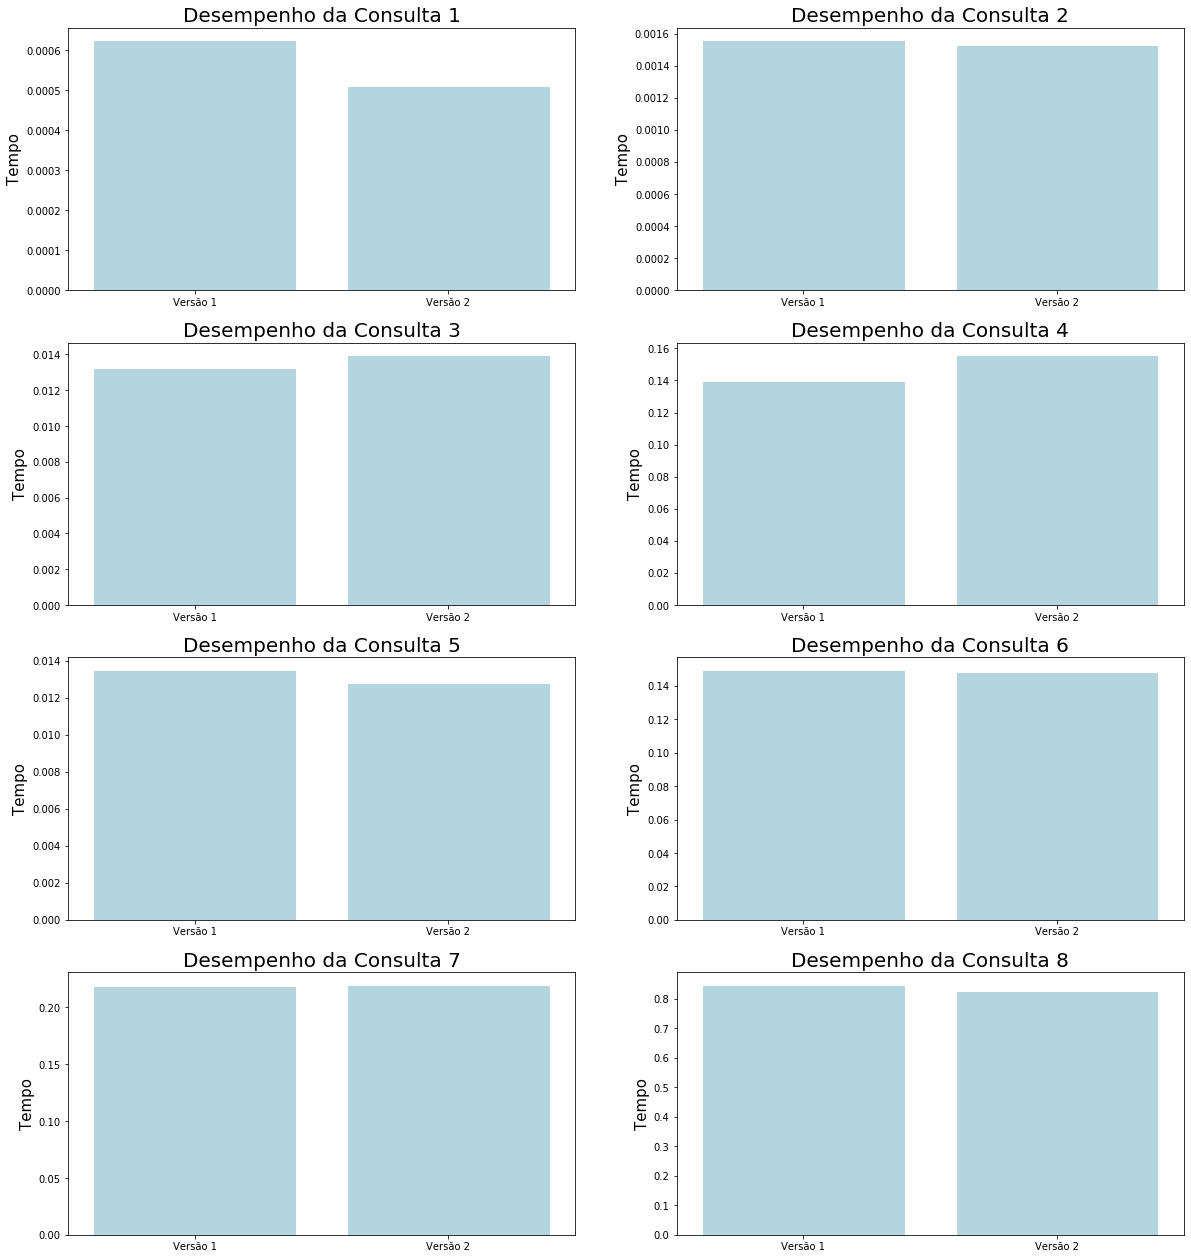

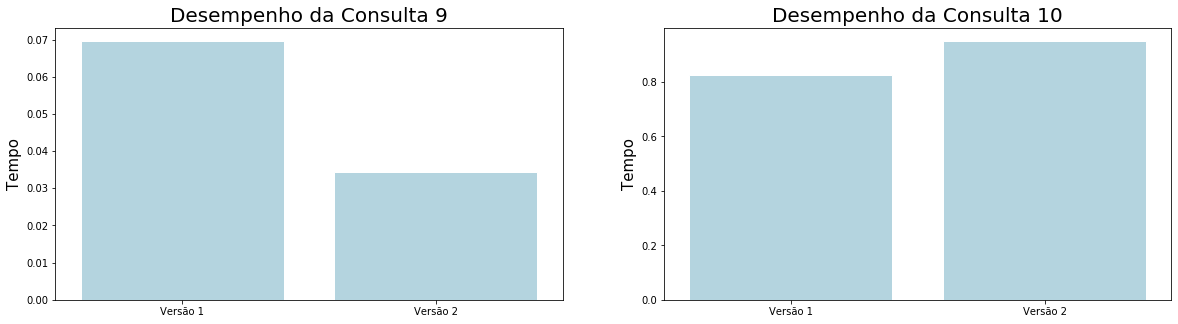

In [19]:
df = pd.DataFrame(analiseDesempenho)
plt.figure(figsize = (20,28))

for col in range(1,9):
        plt.subplot(520+int(col))
        g = sns.barplot(x=['Versão 1', 'Versão 2'], y=df[col], color='lightblue', edgecolor='white')
        g.set_title('Desempenho da Consulta '+str(col), fontsize=20)
        g.set_xlabel("", fontsize=15)
        g.set_ylabel("Tempo", fontsize=15)

plt.savefig('imgs/analiseDesempenho1.png')
plt.show()

plt.figure(figsize = (20,5))
i = 1
for col in range(9,11):
        plt.subplot(120+i)
        i += 1
        g = sns.barplot(x=['Versão 1', 'Versão 2'], y=df[col], color='lightblue', edgecolor='white')
        g.set_title('Desempenho da Consulta '+str(col), fontsize=20)
        g.set_xlabel("", fontsize=15)
        g.set_ylabel("Tempo", fontsize=15)
    
plt.savefig('imgs/analiseDesempenho2.png')
plt.show()